<h1> Classes and Object-orientated programming </h1>

So far in this course, you've seen:

* Data types such as ints, floats, booleans and strings
* Operators (>, <, ==) for comparing values
* Conditionals (if, if-then-else) for controlling program flow
* Loops (for, while) for repeated operations
* Lists, tuples and dictionaries for storing multiple pieces of data.
* How to read and write to files
* Python libraries for plotting (matplotlib) and mathematical (NumPy) and scientific (SciPy) operations.

We've also seen that a computer program consists of a sequence of lines of code, with each line executed in order. We've discussed that for most programs it's a good idea to organise code into *functions*, with each function performing a single task. Writing code this way makes our code more likely to be correct and much easier to read. Today, we'll look at another way of organising code - by defining *Classes*, which can then be used to create *Objects*. 


<h2> Classes and Objects

An *object* is a a grouping of data (i.e variables) and behaviours (i.e functions) together. By grouping data and behaviour together, we can write some pieces of code more naturally, whilst also reducing the possibility of incorrectly inputting the wrong data to a function. 

A *class* is a code template for creating objects. It defines what the data and behaviours associated with an object are. A class definition must contain an *initalisation* function that defines what happens when an object is created. We can think of the relation between classes and objects as a bit like the relationship between a blueprint and a house - the class (blueprint) tells us how something should be built, but is different than an object (house) which is an actual thing that is made.

Let's try to make this a bit more concrete. Let's consider writing some code for a very simple bank account. We could achieve this using functions with the following code:

In [11]:
def deposit(account, amount):
    account["balance"] += amount

def withdraw(account, amount):
    if amount > account["balance"]:
        return False 
    account["balance"] -= amount
    return True


account = {"owner": "Alice", "balance": 100}
deposit(account, 50)
withdraw(account, 30)

print(account)



{'owner': 'Alice', 'balance': 120}


This approach is fine, however, there are somethings that may jump out as a bit strange or frustrating. Firstly, there's a clear connection between the functions (deposit, withdraw) and the variable amount. Both functions should only be called with "account" as an input for example, but there's nothing in the code to indicate that. We also have to keep passing the variable account around as an input - it'd be much nicer if we could associate the functions (withdraw, deposit) with the variable, so we didn't need to always pass it as input. 

Let's see how we can re-write this code using classes to address these issues. First, we need to define a BankAccount *class*. In Python, we can do this by using the ```class``` keyword, and then defining a initialisation function (__init__) as seen below. 

In [12]:
class BankAccount:
    def __init__ (self, owner, balance=0):
        self.owner = owner
        self.balance = balance

    def deposit(self, amount):
        self.balance += amount
    
    def withdraw(self, amount):
        if amount > self.balance:
            return False
        else:
            self.balance -= amount
            return True

The code above defines a class, but does not actually create an *object*. To make an instance of the BankAccount class (i.e. a BankAccount object), we need to run the initialisation (__init__) function. We can do this with the following code, which creates a BankAccount owned by Alice and with an initial deposit of 100. 

In [13]:
account = BankAccount("Alice", 100)
print("Initial balance is: £", account.balance)
account.deposit(50)
print("Balance after depositing £50: £", account.balance)

Initial balance is: £ 100
Balance after depositing £50: £ 150


If we wanted to make a second account, we could do so by making another (seperate) instance of the BankAccount object. Crucially, while this object, will have the same behaviour as the first object, the data will be different.

In [14]:
account2 = BankAccount("Bob", 50)
print("Bob has", account2.balance)
print("Alice has", account.balance)

#This line will deposit money in Bob's account, but not Alice's.
print("Depositing £75 in Bob's account")
account2.deposit(75)
print("Bob has", account2.balance)
print("Alice has", account.balance)


Bob has 50
Alice has 150
Depositing £75 in Bob's account
Bob has 125
Alice has 150


<h3> Accessing Data and Functions defined by a class </h3>

The code above introduces two further aspects of Python syntax - the variable *self*, and the dot (.) notation. In fact, these are both ways that we can access data, or execute functions associated with an object. 

We can use the dot notation to access variables or call functions associated with an object. To access the variable ```owner``` associated with account1, we simply write ```account1.owner```. Similarly, to call the function ```deposit```, we write ```account1.deposit(50)```.

The *self* keyword is used to refer to the specific instance of a class. So for instance, in the account1 object, ```self``` refers to account1,but in the account2 object, ```self``` refers to account2. 

!! picture goes here!!

<h3> A Classy Mobile Robot Simulator </h3>

In the first part of this course, we developed a mobile robot simulator. The code we made for this made heavy use of functions, but in practice, if I was to write this code myself, I'd be strongly tempted to write it using Classes. This is particularly helpful if we want to consider scenarios with more than one robot. 

Let's remind ourselves of the code we wrote for our Robot simulator - we'll look at the example from week 4 to reduce the amount of code we need to consider. Here's the "functional" version that we wrote for driving in a "lawnmower" pattern.

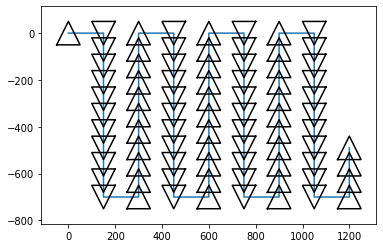

In [ ]:
from math import cos, sin 
import numpy as np 
import matplotlib.pyplot as plt 

#Constants for plotting

robot_size = 50

robot_shape = robot_size*np.array([[-1,0,1,-1],
                                  [-1,1,-1,-1]])

x_log = []
y_log = []
th_log = []

# constants about the robot
robot_name = "Daneel"
robot_radius = 160
wheel_separation = 150
robot_wheel_radius = 35

# function to calculate sinc
def sinc(x):

    if x**2<0.01**2:
        the_sinc = 1-(x*x/6.0)
    else:
        the_sinc = sin(x)/x

    return the_sinc

# function to calculate if distance between two points closer than threshold
def closer(x1,y1,x2,y2,d):

    flag = False
    if (x2-x1)**2 + (y2-y1)**2 < d**2:
        flag = True

    return flag

# function to move robot
def new_robot_pos(robot_x_position,robot_y_position,robot_heading,ang_speed_left,ang_speed_right,delta_t):

    # convert angular speeds into linear speeds with linear_velocity = angular_velocity * radius
    linear_speed_left = ang_speed_left * robot_wheel_radius
    linear_speed_right = ang_speed_right * robot_wheel_radius
    # angular speed of the robot is given by the difference in speeds divided by wheel spacing
    ang_speed_robot = (linear_speed_left - linear_speed_right) / wheel_separation
    # multiply angular speed by time to get the amount the angle has changed.
    angle_change = ang_speed_robot * delta_t
    # average forward speed
    ave_speed = 0.5*(linear_speed_left + linear_speed_right)

    # propagate state
    new_robot_x_position = robot_x_position + ave_speed*delta_t*sinc(0.5*angle_change)*sin(robot_heading + 0.5*angle_change)
    new_robot_y_position = robot_y_position + ave_speed*delta_t*sinc(0.5*angle_change)*cos(robot_heading + 0.5*angle_change)
    new_robot_heading = robot_heading + angle_change

    return new_robot_x_position, new_robot_y_position, new_robot_heading

# any more functions you need in here
def robot_pivot_on_wheel(robot_x_position,robot_y_position,robot_heading,clockwise):

    # pivot on one wheel
    if clockwise==True:
        ang_speed_left = 1
        ang_speed_right = 0
    else:
        ang_speed_left = 0
        ang_speed_right = 1

    delta_t = 13.464
    new_robot_x_position, new_robot_y_position, new_robot_heading = new_robot_pos(robot_x_position,robot_y_position,robot_heading,ang_speed_left,ang_speed_right,delta_t)
    
    return new_robot_x_position, new_robot_y_position, new_robot_heading

# any more functions you need in here
def robot_drive_forward(robot_x_position,robot_y_position,robot_heading,delta_t):

    # drive forward for delta_t seconds at default speed (37mm/s)
    new_robot_x_position, new_robot_y_position, new_robot_heading = new_robot_pos(robot_x_position,robot_y_position,robot_heading,1,1,delta_t)
    
    return new_robot_x_position, new_robot_y_position, new_robot_heading

#plotting functions
def init_plot(x_position,y_position,heading):
    x_log.clear()
    y_log.clear()
    th_log.clear()
    snapshot(x_position,y_position,heading)

def snapshot(x_position,y_position,heading):
    x_log.append(x_position)
    y_log.append(y_position)
    th_log.append(heading)

def rotation_matrix(theta):
    return np.array([[cos(theta),sin(theta)],
                     [-sin(theta),cos(theta)]])

def show_plot():
    plt.plot(x_log,y_log)
    for ii in range(len(th_log)):
        this_shape = rotation_matrix(th_log[ii])@robot_shape
        plt.plot(x_log[ii]+this_shape[0,:],
                 y_log[ii]+this_shape[1,:],'k-')
    plt.axis('equal')
    plt.show()

# main simulation function
def main():

    # initial robot configuration
    robot_x_position = 0
    robot_y_position = 0
    robot_heading = 0
    
    init_plot(0,0,0)

    # flag for detecting obstacle
    obstacle_flag = False

    for ii in range(5):

        for jj in range(22):
            # cycle of 22 moves for each pair of "rungs": turn right, 10*steps forward, turn left, 10*steps forward
            if jj==0:
                # first step - turn right
                robot_x_position,robot_y_position,robot_heading = robot_pivot_on_wheel(robot_x_position,robot_y_position,robot_heading,True)
            elif jj==11:
                # step 11 - turn left
                robot_x_position,robot_y_position,robot_heading = robot_pivot_on_wheel(robot_x_position,robot_y_position,robot_heading,False)                
            else:
                # all other steps - drive forward
                robot_x_position,robot_y_position,robot_heading = robot_drive_forward(robot_x_position,robot_y_position,robot_heading,2)

            #print(ii,jj,robot_x_position,robot_y_position,robot_heading)
            snapshot(robot_x_position,robot_y_position,robot_heading)

            if closer(robot_x_position,robot_y_position,1200,-400,100):
                # break here will only exit the inner "for jj" loop
                # to also stop the outer "for ii" loop, set a flag as a message
                obstacle_flag = True
                break

        if obstacle_flag==True:
            # exit this loop as well if reached the obstacle
            break

    show_plot()

# magic to run the main function if invoked as a script
if __name__=='__main__':
    main()

Notice, that we're having to constantly pass around the "state" variables associated with our robot (i.e robot_x_position, robot_y_position, robot_heading). By using a class, we can avoid the need for this. Let's look at how we could re-write this code using an object-orientated approach. First, we need to define the class and the initialisation function. The code below does this for us, storing key constants and initialising variables to appropriate values.

In [18]:
class Robot:
    def __init__(self, radius, wheel_radius, wheel_separation, x_position=0, y_position=0, heading=0):

        self.radius = radius 
        self.wheel_radius = wheel_radius
        self.wheel_separation = wheel_separation
        self.x_position = x_position
        self.y_position = y_position
        self.heading = heading

We can then add an updated ```new_robot_position``` function, which we'll rename ```move``` for simplicity. Using a Class based approach, the code simplifies to:

In [24]:
class Robot:
    def __init__(self, radius, wheel_radius, wheel_separation, x_position=0, y_position=0, heading=0):

        self.radius = radius 
        self.wheel_radius = wheel_radius
        self.wheel_separation = wheel_separation
        self.x_position = x_position
        self.y_position = y_position
        self.heading = heading

    def move(self, ang_speed_left, ang_speed_right, delta_t):

        # convert angular speeds into linear speeds with linear_velocity = angular_velocity * radius
        linear_speed_left = ang_speed_left * self.wheel_radius
        linear_speed_right = ang_speed_right * self.wheel_radius
        # angular speed of the robot is given by the difference in speeds divided by wheel spacing
        ang_speed_robot = (linear_speed_left - linear_speed_right) / self.wheel_separation
        # multiply angular speed by time to get the amount the angle has changed.
        angle_change = ang_speed_robot * delta_t
        # average forward speed
        ave_speed = 0.5*(linear_speed_left + linear_speed_right)

        # propagate state
        self.x_position +=  ave_speed*delta_t*sinc(0.5*angle_change)*sin(self.heading + 0.5*angle_change)
        self.y_position +=  ave_speed*delta_t*sinc(0.5*angle_change)*cos(self.heading + 0.5*angle_change)
        self.heading += angle_change


We can then initialise an instance of our robot object and asked it to move

In [32]:
robot = Robot(robot_radius, wheel_separation, robot_wheel_radius)
print("X position:", robot.x_position, ", Y position:", robot.y_position)
print("Moving forward for one second")
robot.move(1, 1, 1)
print("X position:", robot.x_position, ", Y position:", robot.y_position)

X position: 0 , Y position: 0
Moving forward for one second
X position: 0.0 , Y position: 150.0


<h2> Abstract Data Structures</h2>

So far in this course, we've made extensive use of Python's built-in *list* data structure. A list can be used to store multiple values (of the same or different types), and many of the algorithms that we've implemented so far has worked by operating on lists. We've also seen some of Python's other built-in data structures, like *set*, which is like a list, but does not allow duplicate values, or the *dict*, in which each value is associated with a *key*, rather than an *index*, and a numpy *array*, in which all data must be of the same type (i.e all floats, or all 16 bit integers). 

Each of these data structures has certain advantages and disadvantages- for example, if we want to check whether a list of length N contains the value x, it'll take on average N *operations*, where as if we want to check whether a dictionary with N keys contains the key x, in the best case, it'll only take a single *operation*. If we're writing an algorithm that requires us to repeatedly check whether a value is in a data structure, it'll run much quicker if we use a dictionary rather than a list. 

In [26]:
import time

# Create a list and a dictionary with 10^6 elements
lst = list(range(10**7))
dct = {i: None for i in range(10**7)}

# Search for an element that doesn't exist
search_element = 10**7 + 1

# Measure the time taken to search in the list
start_time = time.time()
print(search_element in lst)
end_time = time.time()
print("Time taken to search in list: %f seconds" % (end_time - start_time))

# Measure the time taken to search in the dictionary
start_time = time.time()
print(search_element in dct)
end_time = time.time()
print("Time taken to search in dict: %f seconds" % (end_time - start_time))

False
Time taken to search in list: 0.259458 seconds
False
Time taken to search in dict: 0.000045 seconds


Running that code on my machine, I find that the list search takes 0.25 seconds, while the dictionary search takes 0.00045 seconds- an almost 500x speed-up (the results may be different on your machine, particularly the first time you run the code- if you see the dict take longer, try running it a few times). The important point to understand here is that our choice of data structure can affect the running time of our code, and as we'll soon see also how hard it is to implement certain algorithms. 

Going beyond Python's built-in data types, there are many other data types that we could use, each with their own benefits and drawbacks. Today, we'll introduce three new data structures and see how they can be used to simplify the implementation of certain algorithms. Typically, these data structures are not built-in to Python, so we'll first need to write some code - using Classes - for implementing them. 

<h3> Stacks and Queues </h3>

The first new data structure we'll look at is the *stack*. A stack is a collection of elements with only two operations available:

1. Push (add an element to the stack)
2. Pop (remove  and return the most recently added element)

Stacks are often described as Last-In, First-Out (LIFO), as this is the order in which elements are added or removed from the stack. A simple analogy is a stack of physical objects (such as pieces of paper). When I'm given a new piece of paper, I put it on top of the pile. When it's time for me to start processing the pile, I start by removing the elements from the top, one at a time. 

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/weekly_labs/week_16_OOP_and_abstract_data_types/Lifo_stack.png?raw=true" width=425/> 

In Python, it's possible to just use a list as a stack (we can use the built-in *pop* and *append* methods), but we can make our code more readable by making a Stack class to represent our new data structure. The following code implements a basic stack:

In [27]:
class Stack:

	def __init__(self):
		self.stack = []

	def push(self, item):
		self.stack.append(item)

	def pop(self):
		if len(self.stack) < 1:
			return None
		return self.stack.pop()

	def is_empty(self):
		return len(self.stack)==0

def test_stack():

	print("Running tests")
	stack = Stack()
	stack.push(1)
	stack.push(2)
	stack.push(3)
	assert stack.is_empty()==False
	assert stack.pop()==3
	assert stack.pop()==2
	assert stack.pop()==1
	assert stack.is_empty()==True 
	print("Tests complete")

test_stack()

Running tests
Tests complete


Here, our initialisation function creates an empty list to represent the stack. We then define the push and pop operations using the built-in append and pop operations. We've also created an additional method, is_empty, to tell us whether the stack is empty or not. 

Now that we have written some code to represent our abstract data structures, we can use them to write some simple algorithms. The first algorithm we'll look at, is using a stack to reverse a string- for example, if we're given the string "BANANA", can we write an algorithm to turn it into "ANANAB"? By using a stack, we can do this relatively easily. The key idea is to start with an empty stack and then iterate over the string, adding each letter to the stack as we go. Once we've got to the end of string, we can then build a new string by popping each element of the stack we've made. As a stack is a LIFO data structure, the elements will come out in the reverse order. In code, we can do this by writing:

In [28]:
my_string = "BANANA"
stack = Stack()

for letter in my_string:
	stack.push(letter)

reversed_string = ''
while not stack.is_empty():
	reversed_string+=stack.pop()

print(my_string)
print(reversed_string)

BANANA
ANANAB


<h3> Trees and Binary Search </h3>

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/weekly_labs/week_16_OOP_and_abstract_data_types/tree.svg?raw=true" width=425/> 

Another abstract data structure we'll look at today is a *tree*. Trees are a common data structure- probably you are most familiar with a tree structure from the file directory used to organise the files and folders on most computers. A *tree* is used to represent a set of nodes that are connected in some kind of heirarchical relationship. Each node can be connected to many *children*, but only one *parent*, except for the root node, which has no parent. In the image above, the root node is shown in red. It has two children, one with a value of 7, and one with a value of 5. 

As with the stack and the queue, if we want to use a tree in our Python code, we'll first need to implement it. We can do this by again defining a class to represent the data structure:

In [29]:
class Tree:
	def __init__(self, value):
		self.value = value
		self.children = []

	def add_child(self, child):
		if isinstance(child, Tree):
			self.children.append(child)

	def print_tree(self, depth=0):
		print("  " * depth + self.value)
		for child in self.children:
			child.print_tree(depth + 1)

root = Tree('root')
child1 = Tree('child1')
root.add_child(child1)
child2 = Tree('child2')
root.add_child(child2)
grandchild1 = Tree('grandchild1')
child1.add_child(grandchild1)
greatgrandchild1 = Tree('greatgrandchild1')
grandchild1.add_child(greatgrandchild1)
root.print_tree()

root
  child1
    grandchild1
      greatgrandchild1
  child2
